In [21]:
import pandas as pd
import numpy as np
import ccxt
import config
import tradingstation

In [22]:
ex = ccxt.bybit({
    'apiKey' : config.API_KEYS['bybit']['api_key'],
    'secret' : config.API_KEYS['bybit']['api_secret'],
    'enableRateLimit' : True })

In [4]:
def check_symbols(type='swap'):
    markets = pd.DataFrame(ex.fetch_markets())
    swap_symbols = markets.loc[(markets['type'] == type)&(markets['quoteId'] == 'USDT'), 'symbol']
    return swap_symbols



In [7]:
symbols = check_symbols()

NameError: name 'check_symbols' is not defined

In [8]:
symbols = ['BTC/USDT:USDT','APT/USDT:USDT','UNI/USDT:USDT']

In [15]:
for symbol in symbols: 
    candles = pd.DataFrame(ex.fetch_ohlcv(symbol, timeframe='1m', limit=1000), 
                           columns=['timestamp', 'open', 'high', 'low', 'close', 'volume']
    )
    tradingstation.Indicators(candles).volatility()
    tradingstation.Indicators(candles).parabolic_sar()
    tradingstation.Indicators(candles).rsi()
    
    volatility = candles['volatility60'].iloc[-1]
    sar = candles['sar'].iloc[-1]
    rsi = candles['rsi'].iloc[-1]
    if rsi < 34 :
        print(f'Symbol: {symbol}')
        #print(candles.iloc[-1])
        print(f'Volatility: {volatility:.4f}')
        print(f'RSI: {rsi}')

<Axes: >

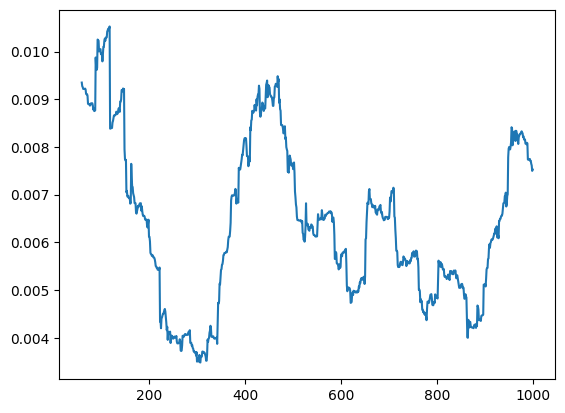

In [12]:
candles['volatility60'].plot()

In [24]:
from alerts import telegram_alert

In [26]:
telegram_alert.send_telegram_message('ciau valu')